In [1]:
import pandas as pd

df = pd.read_csv('data/특수형태근로종사자_산재보험.csv', encoding='utf-8-sig')

In [2]:


import rhinoMorph
rn = rhinoMorph.startRhino()

#stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임"
stop_words= "레고 피보 프리랜서분 정답 은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임 하 있 되 않 었 사람 지 보 때 같 년 대하 주 말 일 위하 때문 말하 가 받 그렇 알 하 경우 가요"
stop_words = stop_words.split(' ')
stop_words[0:10]

filepath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages
classpath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


['레고', '피보', '프리랜서분', '정답', '은', '이', '것', '등', '더', '를']

In [3]:
df

,Unnamed: 0,URL 주소,댓글작성자명,댓글작성일자,댓글 내용
0,0,https://www.youtube.com//watch?v=QRycZR13GKE,윤이,1주 전,안녕하세요 요즘 알아보다가 우연히 영상을 접하게 되었습니다 헬스트레이너로 일하고있습...
1,1,https://www.youtube.com//watch?v=7E7NRS2rKS0,불타오르네.,4주 전,대행기사등록할때 산재가입을할것이냐 질문도안하고 그런게있는지도 몰라서 가입을안하고 사...
2,2,https://www.youtube.com//watch?v=7E7NRS2rKS0,a sk,4주 전,휴업 또는 휴직처리는 어떤식으로 되나요??
3,3,https://www.youtube.com//watch?v=Uaz8b39NX34,JINZZA대구,2개월 전,특근자도 산재처리 된다고 한줄쫘악
4,4,https://www.youtube.com//watch?v=_CMzJWwKI-o,Coming soon,3개월 전,"한국판 뉴딜, 동참~ 대통령님, 발표, 발표~ 아름다운 말, 사회적인 계약~ 같이 ..."
...,...,...,...,...,...
994,994,https://www.youtube.com//watch?v=iOjsGgp1r98,그냥,1년 전,당ㆍ정ㆍ청~적폐청산 더강하게 더독하게**
995,995,https://www.youtube.com//watch?v=iOjsGgp1r98,쿵푸복어,1년 전,산재도좋고 다좋은데 여의도왜구 광화문왜구 다어쩌실거요?무당층이 확늘어난이유가뭘까?너...
996,996,https://www.youtube.com//watch?v=1MwOFKELGEw,국화,6개월 전,고용산재 하수급승인받은 하도급인데요 그럼 계약할때 계약금액에 고용산재를 포함한 금...
997,997,https://www.youtube.com//watch?v=TdtEdEQBiJM,강남김밥,3개월 전,정권의 징수 나팔수들


In [4]:
import re
answer_sentences = []
for post in df['댓글 내용']:
    answer_sentences.extend(re.split('; |\.|\?|\!', post))
#title_sentences[0:100]


answer_sentences_nouns = []

for senten in answer_sentences:
    morphed_data_sentences = [noun_answer for noun_answer in rhinoMorph.onlyMorph_list(rn, senten, pos=['NNG', 'NNP'],combineN=True) if noun_answer not in stop_words]
    answer_sentences_nouns.append(morphed_data_sentences)
#sentences_nouns


answer_sentences_nouns_result = []

for i in answer_sentences_nouns:
    senten_list=[]
    for j in i:
        if len(j)== 1:
            continue
        senten_list.append(j)
    answer_sentences_nouns_result.append(senten_list)
#sentences_nouns_result

answer_result = []

for i in answer_sentences_nouns_result:
    if len(i) ==0:
        continue
    i = " ".join(i)
    answer_result.append(i)

#title_result

answer_result= ",".join(answer_result)
answer_result = answer_result.replace(","," ")
#title_result

final_answer = answer_result.split(" ")
#final_title

from collections import Counter

wordInfo_answer = Counter(final_answer)
#wordInfo_title

answer_top50 = dict(wordInfo_answer.most_common(50))
answer_top50

{'정보': 72,
 '신청': 68,
 '산재': 50,
 '자원관리도우미': 48,
 '회사': 44,
 '영상': 38,
 '산재보험': 36,
 '가능한가': 30,
 '프리랜서': 30,
 '안녕': 29,
 '소득': 27,
 '해당': 26,
 '급여': 26,
 '은정': 25,
 '통장': 25,
 '감사': 24,
 '금액': 23,
 '설명': 22,
 '코로나': 22,
 '서류': 21,
 '월급': 20,
 '고용보험': 20,
 '입금내역': 19,
 '일용직': 18,
 '올해': 17,
 '질문': 16,
 '이상': 16,
 '근로자': 16,
 '지원': 16,
 '정도': 15,
 '오늘': 15,
 '국민': 15,
 '수술': 14,
 '도움': 14,
 '온라인': 14,
 '도우미': 14,
 '필요': 13,
 '이번': 13,
 '방법': 13,
 '유익': 13,
 '기사': 13,
 '입금': 13,
 '산재처리': 12,
 '본인': 12,
 '병원': 12,
 '지금': 12,
 '가능': 12,
 '작년': 12,
 '화물차': 12,
 'NEW': 12}

In [5]:
answer_top30 = dict(wordInfo_answer.most_common(30))
answer_top30

{'정보': 72,
 '신청': 68,
 '산재': 50,
 '자원관리도우미': 48,
 '회사': 44,
 '영상': 38,
 '산재보험': 36,
 '가능한가': 30,
 '프리랜서': 30,
 '안녕': 29,
 '소득': 27,
 '해당': 26,
 '급여': 26,
 '은정': 25,
 '통장': 25,
 '감사': 24,
 '금액': 23,
 '설명': 22,
 '코로나': 22,
 '서류': 21,
 '월급': 20,
 '고용보험': 20,
 '입금내역': 19,
 '일용직': 18,
 '올해': 17,
 '질문': 16,
 '이상': 16,
 '근로자': 16,
 '지원': 16,
 '정도': 15}

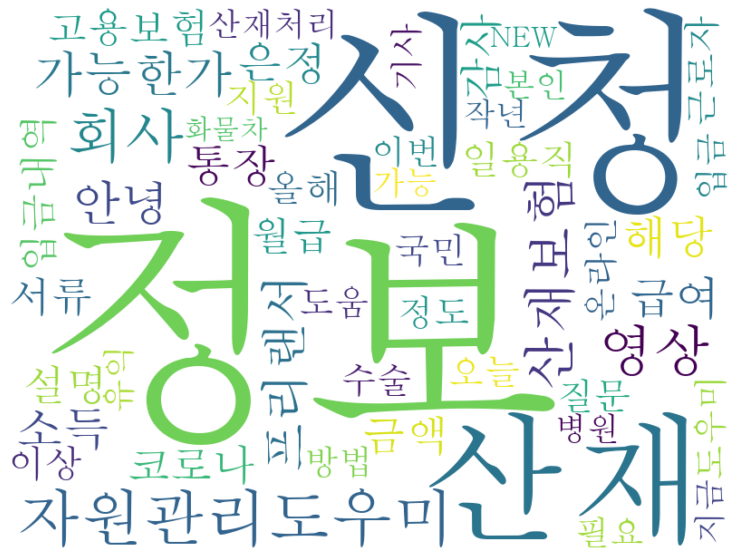

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud(font_path='C:/windows/fonts/batang.ttc', width=800, height=600,background_color='white').generate_from_frequencies(answer_top50)
plt.figure(figsize=(30,10))
plt.imshow(cloud, interpolation='bilinear')  # 글자를 더 부드럽게 나오게 한다
plt.axis('off')                              # X축과 Y축의 위치 정보 off
plt.show()

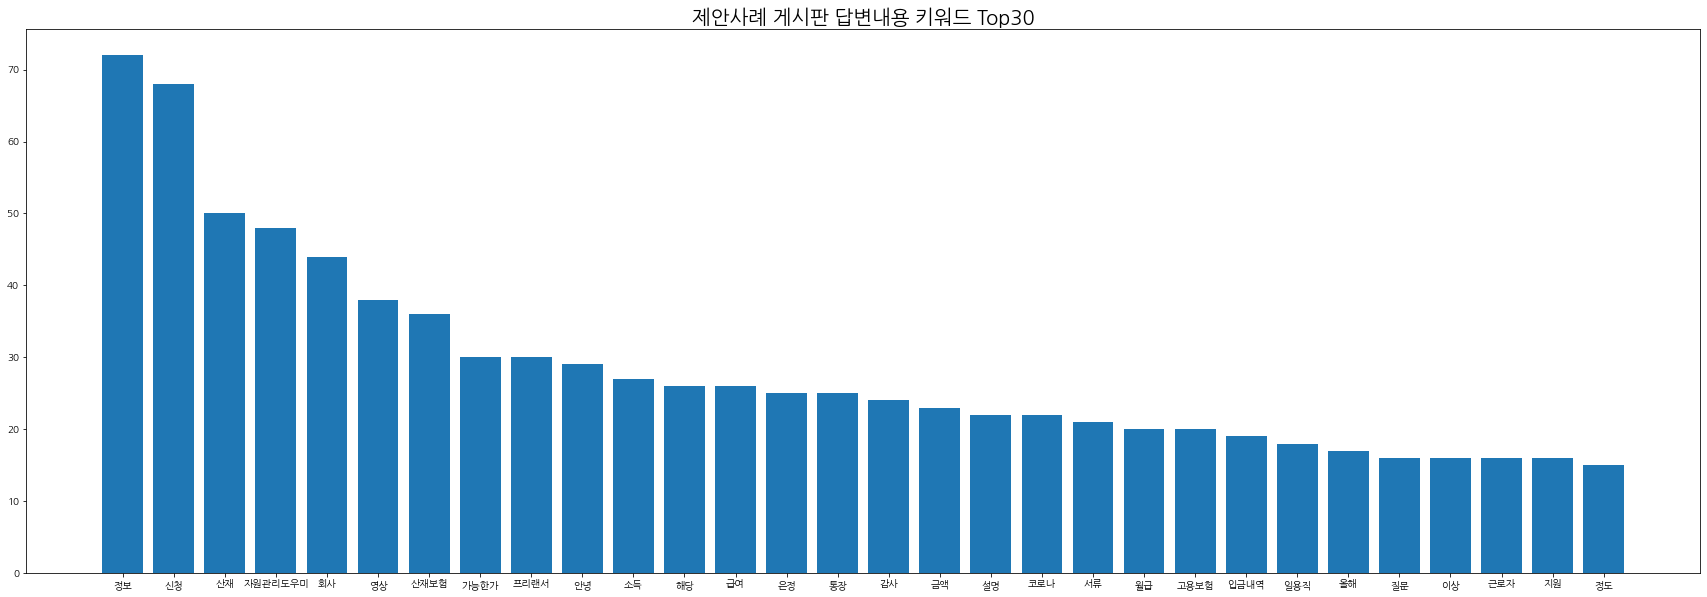

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

top_title_keys=[i for i in answer_top50.keys()]
top_title_values=[i for i in answer_top50.values()]

plt.figure(figsize= (30,10))
plt.title("제안사례 게시판 답변내용 키워드 Top30", fontsize=20)
plt.bar(list(top_title_keys[:30]), list(top_title_values[:30]))
plt.show()

In [8]:
#content_top_100 

answer_top50_word2id = {w: i for i, w in enumerate(answer_top50.keys())}
answer_top50_word2id

{'정보': 0,
 '신청': 1,
 '산재': 2,
 '자원관리도우미': 3,
 '회사': 4,
 '영상': 5,
 '산재보험': 6,
 '가능한가': 7,
 '프리랜서': 8,
 '안녕': 9,
 '소득': 10,
 '해당': 11,
 '급여': 12,
 '은정': 13,
 '통장': 14,
 '감사': 15,
 '금액': 16,
 '설명': 17,
 '코로나': 18,
 '서류': 19,
 '월급': 20,
 '고용보험': 21,
 '입금내역': 22,
 '일용직': 23,
 '올해': 24,
 '질문': 25,
 '이상': 26,
 '근로자': 27,
 '지원': 28,
 '정도': 29,
 '오늘': 30,
 '국민': 31,
 '수술': 32,
 '도움': 33,
 '온라인': 34,
 '도우미': 35,
 '필요': 36,
 '이번': 37,
 '방법': 38,
 '유익': 39,
 '기사': 40,
 '입금': 41,
 '산재처리': 42,
 '본인': 43,
 '병원': 44,
 '지금': 45,
 '가능': 46,
 '작년': 47,
 '화물차': 48,
 'NEW': 49}

In [9]:
#content_top_100 

answer_top30_word2id = {w: i for i, w in enumerate(answer_top30.keys())}
answer_top30_word2id

{'정보': 0,
 '신청': 1,
 '산재': 2,
 '자원관리도우미': 3,
 '회사': 4,
 '영상': 5,
 '산재보험': 6,
 '가능한가': 7,
 '프리랜서': 8,
 '안녕': 9,
 '소득': 10,
 '해당': 11,
 '급여': 12,
 '은정': 13,
 '통장': 14,
 '감사': 15,
 '금액': 16,
 '설명': 17,
 '코로나': 18,
 '서류': 19,
 '월급': 20,
 '고용보험': 21,
 '입금내역': 22,
 '일용직': 23,
 '올해': 24,
 '질문': 25,
 '이상': 26,
 '근로자': 27,
 '지원': 28,
 '정도': 29}

In [10]:

answer_top30_word2id = {w: i for i, w in enumerate(answer_top30.keys())}
answer_top30_word2id

{'정보': 0,
 '신청': 1,
 '산재': 2,
 '자원관리도우미': 3,
 '회사': 4,
 '영상': 5,
 '산재보험': 6,
 '가능한가': 7,
 '프리랜서': 8,
 '안녕': 9,
 '소득': 10,
 '해당': 11,
 '급여': 12,
 '은정': 13,
 '통장': 14,
 '감사': 15,
 '금액': 16,
 '설명': 17,
 '코로나': 18,
 '서류': 19,
 '월급': 20,
 '고용보험': 21,
 '입금내역': 22,
 '일용직': 23,
 '올해': 24,
 '질문': 25,
 '이상': 26,
 '근로자': 27,
 '지원': 28,
 '정도': 29}

In [11]:
answer_top50_id2word = {i: w for i, w in enumerate(answer_top50.keys())}
answer_top50_id2word

{0: '정보',
 1: '신청',
 2: '산재',
 3: '자원관리도우미',
 4: '회사',
 5: '영상',
 6: '산재보험',
 7: '가능한가',
 8: '프리랜서',
 9: '안녕',
 10: '소득',
 11: '해당',
 12: '급여',
 13: '은정',
 14: '통장',
 15: '감사',
 16: '금액',
 17: '설명',
 18: '코로나',
 19: '서류',
 20: '월급',
 21: '고용보험',
 22: '입금내역',
 23: '일용직',
 24: '올해',
 25: '질문',
 26: '이상',
 27: '근로자',
 28: '지원',
 29: '정도',
 30: '오늘',
 31: '국민',
 32: '수술',
 33: '도움',
 34: '온라인',
 35: '도우미',
 36: '필요',
 37: '이번',
 38: '방법',
 39: '유익',
 40: '기사',
 41: '입금',
 42: '산재처리',
 43: '본인',
 44: '병원',
 45: '지금',
 46: '가능',
 47: '작년',
 48: '화물차',
 49: 'NEW'}

In [12]:
answer_top30_id2word = {i: w for i, w in enumerate(answer_top30.keys())}
answer_top30_id2word

{0: '정보',
 1: '신청',
 2: '산재',
 3: '자원관리도우미',
 4: '회사',
 5: '영상',
 6: '산재보험',
 7: '가능한가',
 8: '프리랜서',
 9: '안녕',
 10: '소득',
 11: '해당',
 12: '급여',
 13: '은정',
 14: '통장',
 15: '감사',
 16: '금액',
 17: '설명',
 18: '코로나',
 19: '서류',
 20: '월급',
 21: '고용보험',
 22: '입금내역',
 23: '일용직',
 24: '올해',
 25: '질문',
 26: '이상',
 27: '근로자',
 28: '지원',
 29: '정도'}

In [13]:
import numpy as np

# 50 단어 인접행렬
answer_adjacent_matrix_50 = np.zeros((50, 50), int)
for sentence in answer_sentences_nouns_result:
    for wi, i in answer_top50_word2id.items():
        if wi in sentence:
            for wj, j in answer_top50_word2id.items():
                if i != j and wj in sentence:
                    answer_adjacent_matrix_50[i][j] += 1
answer_adjacent_matrix_50

array([[0, 0, 1, ..., 0, 6, 0],
       [0, 0, 8, ..., 0, 0, 0],
       [1, 8, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
answer_sentences_nouns_result

[['안녕', '요즘', '영상', '헬스트레이너', '시간정도', '기본급', '수업', '진행', '인센티브', '구조', '절차'],
 ['특수근로자', '해당'],
 ['영상'],
 [],
 ['대행', '산재', '질문도안', '가입', '사고가'],
 ['산재적용'],
 [],
 ['휴업', '휴직처리'],
 [],
 [],
 ['특근', '산재처리'],
 ['한국판', '뉴딜', '동참', '대통령', '발표', '발표', '사회적', '계약'],
 [],
 [],
 ['정보'],
 [],
 ['텐션'],
 ['라주', '산재보상'],
 ['부분'],
 ['공유', '주변'],
 [],
 [],
 ['특근', '산재'],
 ['리얼'],
 ['본인'],
 [],
 ['회사', '산재신청', '불가'],
 [],
 [],
 ['은정', '구독', '선생', '채널', '번창'],
 ['산재신청'],
 ['귀로', '채널은구독', '시청자'],
 ['선생', '직장', '우울증', '투병', '중인', '입원', '기록', '산재'],
 ['직장', '우울증', '인간관계', '산재', '신청'],
 [],
 ['보름전', '회사', '물건'],
 [],
 ['이후', '통증', '회사', '통보후', '연차사용'],
 ['이후', '통증', '근무', '대책', '말해'],
 [],
 ['고견부탁'],
 ['업무', '화약품', '시력저하', '보상', '보상'],
 [],
 [],
 ['선생', '친구', '용병계약직서기호', '아가씨', '얼굴', '산재처리'],
 [],
 ['선생'],
 ['급파', '포장', '오른쪽어깨', '응급실', '병원', '수술'],
 ['재활', '수술후', '어깨', '회사'],
 ['병가',
  '왼쪽',
  '작년이맘때쯤',
  '제사비',
  '요일',
  '둑소리',
  '통증',
  '지금',
  '병가',
  '세달중한',
  '지금주사치',
  '산재처',
  '회사'],
 ['복지공단', '회사',

In [15]:
import numpy as np

# 50 단어 인접행렬
answer_adjacent_matrix_30 = np.zeros((30, 30), int)
for sentence in answer_sentences_nouns_result:
    for wi, i in answer_top30_word2id.items():
        if wi in sentence:
            for wj, j in answer_top30_word2id.items():
                if i != j and wj in sentence:
                    answer_adjacent_matrix_30[i][j] += 1
answer_adjacent_matrix_30

array([[0, 0, 1, 0, 0, 2, 7, 0, 0, 1, 0, 2, 0, 0, 0, 5, 0, 2, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 8, 0, 5, 2, 1, 5, 4, 2, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2,
        0, 1, 0, 0, 3, 0, 2, 1],
       [1, 8, 0, 0, 5, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 5, 5, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 1, 1, 1, 0, 0],
       [2, 2, 2, 0, 2, 0, 3, 0, 1, 2, 0, 0, 0, 3, 0, 2, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0],
       [7, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 0],
       [0, 5, 0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 0,
        0, 2, 2, 0, 2, 1, 0, 0],
       [0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 3,
        0, 0, 1, 0, 0, 1, 1, 0],
       [1, 2, 2, 0, 0, 2, 0, 0, 0, 0,

In [16]:
answer_adjacent_matrix_50.shape, answer_adjacent_matrix_30.shape

((50, 50), (30, 30))

In [17]:
import networkx as nx
answer_network_30 = nx.from_numpy_matrix(answer_adjacent_matrix_30)
list(answer_network_30.adjacency())

[(0,
  {2: {'weight': 1},
   5: {'weight': 2},
   6: {'weight': 7},
   9: {'weight': 1},
   11: {'weight': 2},
   15: {'weight': 5},
   17: {'weight': 2},
   20: {'weight': 1},
   27: {'weight': 1}}),
 (1,
  {2: {'weight': 8},
   4: {'weight': 5},
   5: {'weight': 2},
   6: {'weight': 1},
   7: {'weight': 5},
   8: {'weight': 4},
   9: {'weight': 2},
   10: {'weight': 1},
   11: {'weight': 1},
   12: {'weight': 2},
   14: {'weight': 1},
   16: {'weight': 1},
   18: {'weight': 1},
   19: {'weight': 1},
   20: {'weight': 2},
   21: {'weight': 2},
   23: {'weight': 1},
   26: {'weight': 3},
   28: {'weight': 2},
   29: {'weight': 1}}),
 (2,
  {0: {'weight': 1},
   1: {'weight': 8},
   4: {'weight': 5},
   5: {'weight': 2},
   6: {'weight': 1},
   9: {'weight': 2},
   12: {'weight': 1},
   15: {'weight': 1},
   17: {'weight': 1},
   25: {'weight': 1},
   26: {'weight': 1},
   27: {'weight': 1},
   28: {'weight': 1},
   29: {'weight': 1}}),
 (3, {}),
 (4,
  {1: {'weight': 5},
   2: {'weight

In [18]:
answer_network_50 = nx.from_numpy_matrix(answer_adjacent_matrix_50)
list(answer_network_50.adjacency())

[(0,
  {2: {'weight': 1},
   5: {'weight': 2},
   6: {'weight': 7},
   9: {'weight': 1},
   11: {'weight': 2},
   15: {'weight': 5},
   17: {'weight': 2},
   20: {'weight': 1},
   27: {'weight': 1},
   30: {'weight': 2},
   33: {'weight': 2},
   36: {'weight': 2},
   39: {'weight': 10},
   40: {'weight': 1},
   48: {'weight': 6}}),
 (1,
  {2: {'weight': 8},
   4: {'weight': 5},
   5: {'weight': 2},
   6: {'weight': 1},
   7: {'weight': 5},
   8: {'weight': 4},
   9: {'weight': 2},
   10: {'weight': 1},
   11: {'weight': 1},
   12: {'weight': 2},
   14: {'weight': 1},
   16: {'weight': 1},
   18: {'weight': 1},
   19: {'weight': 1},
   20: {'weight': 2},
   21: {'weight': 2},
   23: {'weight': 1},
   26: {'weight': 3},
   28: {'weight': 2},
   29: {'weight': 1},
   30: {'weight': 2},
   32: {'weight': 4},
   34: {'weight': 1},
   36: {'weight': 1},
   37: {'weight': 2},
   38: {'weight': 1},
   43: {'weight': 1},
   44: {'weight': 1},
   46: {'weight': 5}}),
 (2,
  {0: {'weight': 1},
  

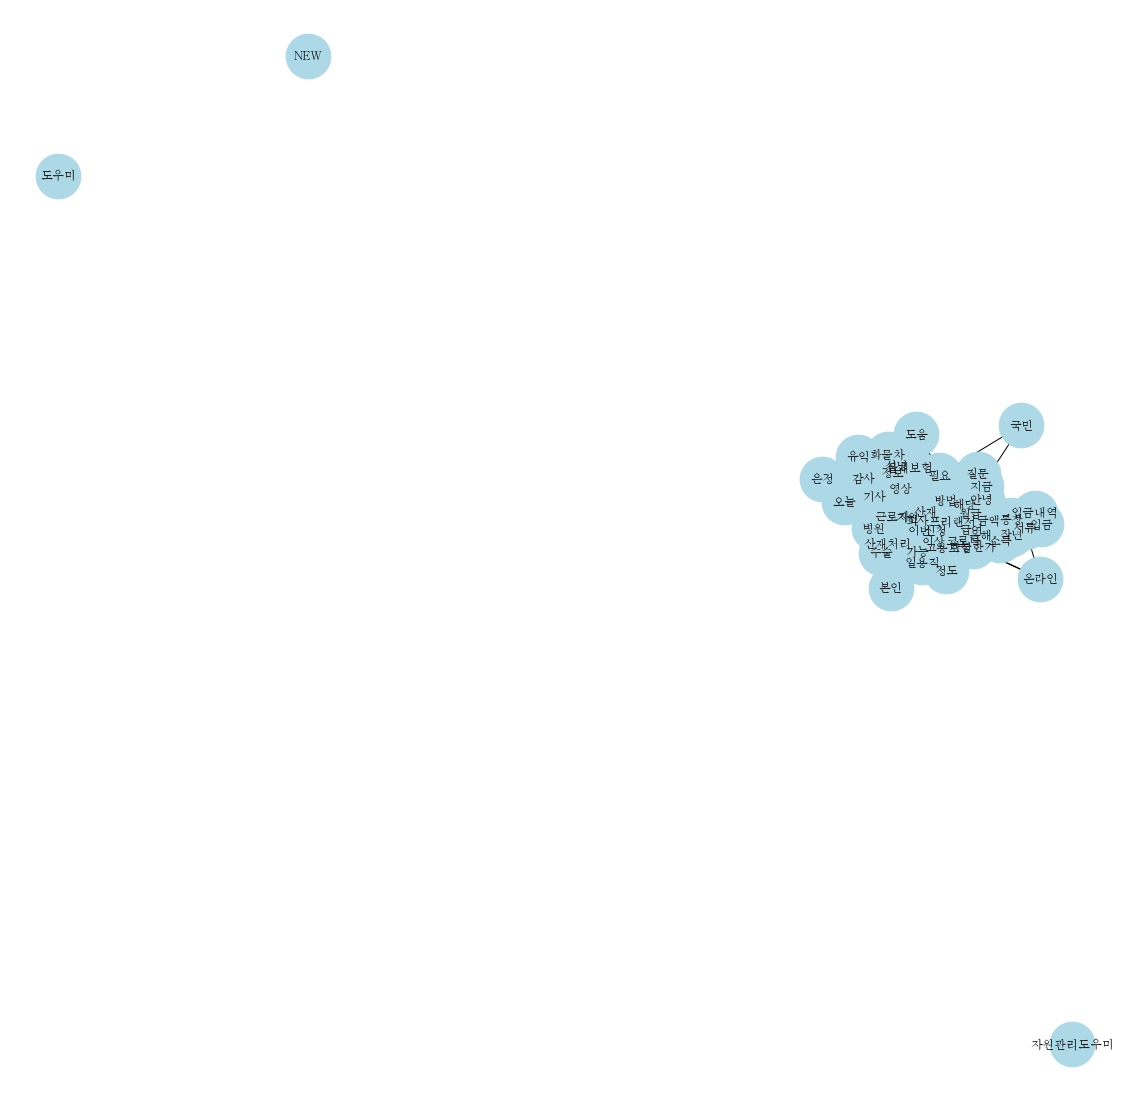

In [19]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 50개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(answer_network_50, labels=answer_top50_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

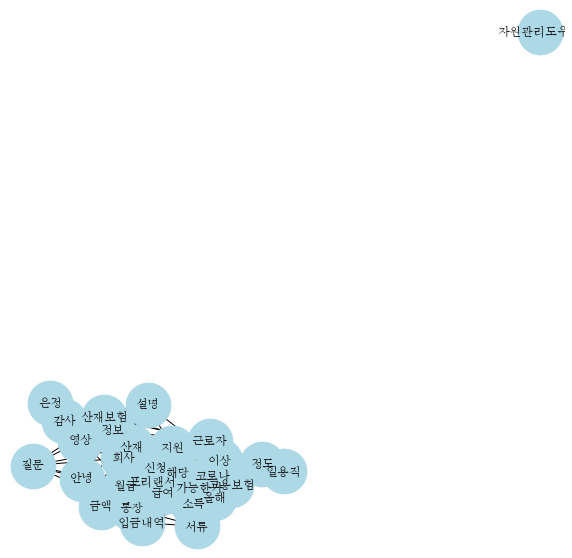

In [20]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 50개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(answer_network_30, labels=answer_top30_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

# 근접중심성

In [21]:
#Closeness
nx.closeness_centrality(answer_network_50, distance='weight')

{0: 0.44064972927946694,
 1: 0.539795918367347,
 2: 0.5021357380161366,
 3: 0.0,
 4: 0.539795918367347,
 5: 0.4643405749396533,
 6: 0.4798185941043084,
 7: 0.5080432172869147,
 8: 0.4643405749396533,
 9: 0.4545649838882922,
 10: 0.44064972927946694,
 11: 0.5080432172869147,
 12: 0.4852098142627838,
 13: 0.3598639455782313,
 14: 0.38904210332781763,
 15: 0.4361987219130076,
 16: 0.4643405749396533,
 17: 0.4451925099936882,
 18: 0.5021357380161366,
 19: 0.4907235621521336,
 20: 0.4798185941043084,
 21: 0.4152276295133438,
 22: 0.38556851311953355,
 23: 0.4594007815892314,
 24: 0.5080432172869147,
 25: 0.4451925099936882,
 26: 0.4907235621521336,
 27: 0.539795918367347,
 28: 0.5021357380161366,
 29: 0.4643405749396533,
 30: 0.39984882842025704,
 31: 0.34272756721736314,
 32: 0.4233693477390957,
 33: 0.37227304714989445,
 34: 0.39257884972170687,
 35: 0.0,
 36: 0.4852098142627838,
 37: 0.5266301642608263,
 38: 0.5140913508260447,
 39: 0.36909122623408336,
 40: 0.46938775510204084,
 41: 0.3

In [22]:
#Closeness
nx.closeness_centrality(answer_network_30, distance='weight')

{0: 0.4827586206896552,
 1: 0.5406896551724139,
 2: 0.5517241379310345,
 3: 0.0,
 4: 0.5632183908045978,
 5: 0.4827586206896552,
 6: 0.5100845803513337,
 7: 0.4915360501567398,
 8: 0.4915360501567398,
 9: 0.4661117717003568,
 10: 0.4661117717003568,
 11: 0.5632183908045978,
 12: 0.4827586206896552,
 13: 0.36045977011494257,
 14: 0.4096133751306165,
 15: 0.4661117717003568,
 16: 0.4661117717003568,
 17: 0.42911877394636017,
 18: 0.5877061469265368,
 19: 0.5100845803513337,
 20: 0.519893899204244,
 21: 0.45821157218001174,
 22: 0.41591511936339526,
 23: 0.4915360501567398,
 24: 0.5752017608217168,
 25: 0.4827586206896552,
 26: 0.5006385696040868,
 27: 0.5632183908045978,
 28: 0.5632183908045978,
 29: 0.4915360501567398}

# 연결중심성

In [23]:
#Degree
nx.degree_centrality(answer_network_50)

{0: 0.3061224489795918,
 1: 0.5918367346938775,
 2: 0.42857142857142855,
 3: 0.0,
 4: 0.4081632653061224,
 5: 0.36734693877551017,
 6: 0.2857142857142857,
 7: 0.3469387755102041,
 8: 0.26530612244897955,
 9: 0.3061224489795918,
 10: 0.2857142857142857,
 11: 0.2857142857142857,
 12: 0.4081632653061224,
 13: 0.08163265306122448,
 14: 0.26530612244897955,
 15: 0.2040816326530612,
 16: 0.24489795918367346,
 17: 0.2040816326530612,
 18: 0.32653061224489793,
 19: 0.24489795918367346,
 20: 0.32653061224489793,
 21: 0.14285714285714285,
 22: 0.2040816326530612,
 23: 0.2040816326530612,
 24: 0.4081632653061224,
 25: 0.14285714285714285,
 26: 0.24489795918367346,
 27: 0.32653061224489793,
 28: 0.26530612244897955,
 29: 0.18367346938775508,
 30: 0.16326530612244897,
 31: 0.04081632653061224,
 32: 0.16326530612244897,
 33: 0.08163265306122448,
 34: 0.061224489795918366,
 35: 0.0,
 36: 0.24489795918367346,
 37: 0.3877551020408163,
 38: 0.2857142857142857,
 39: 0.12244897959183673,
 40: 0.1632653061

In [24]:
#Degree
nx.degree_centrality(answer_network_30)

{0: 0.3103448275862069,
 1: 0.6896551724137931,
 2: 0.48275862068965514,
 3: 0.0,
 4: 0.41379310344827586,
 5: 0.41379310344827586,
 6: 0.27586206896551724,
 7: 0.41379310344827586,
 8: 0.3103448275862069,
 9: 0.3793103448275862,
 10: 0.41379310344827586,
 11: 0.41379310344827586,
 12: 0.48275862068965514,
 13: 0.10344827586206896,
 14: 0.3793103448275862,
 15: 0.27586206896551724,
 16: 0.3103448275862069,
 17: 0.20689655172413793,
 18: 0.48275862068965514,
 19: 0.27586206896551724,
 20: 0.48275862068965514,
 21: 0.20689655172413793,
 22: 0.3103448275862069,
 23: 0.27586206896551724,
 24: 0.5517241379310345,
 25: 0.24137931034482757,
 26: 0.3103448275862069,
 27: 0.3793103448275862,
 28: 0.3448275862068966,
 29: 0.20689655172413793}

# 위세중심성

In [25]:
#Eigenvector
nx.eigenvector_centrality(answer_network_50, weight='weight')

{0: 0.252937710237515,
 1: 0.3841850471562878,
 2: 0.2878365643621791,
 3: 5.873493890001703e-49,
 4: 0.22363283150850238,
 5: 0.19497042453571437,
 6: 0.23393864638608716,
 7: 0.19271985401615133,
 8: 0.1306664406888568,
 9: 0.15814236832306877,
 10: 0.17251382492540268,
 11: 0.11439103769680224,
 12: 0.19933486351168933,
 13: 0.047695150246676,
 14: 0.20180582712402978,
 15: 0.12394486129124783,
 16: 0.13527169184550702,
 17: 0.09353208924105437,
 18: 0.11669415154258102,
 19: 0.07570460766730662,
 20: 0.15222491359723006,
 21: 0.0859990903817932,
 22: 0.11803788403735362,
 23: 0.07795371030076369,
 24: 0.1715249460118917,
 25: 0.06274027803574952,
 26: 0.12967542871299384,
 27: 0.10204776919125248,
 28: 0.09019006490284923,
 29: 0.07543955166137332,
 30: 0.07753579808724476,
 31: 0.005966909382398755,
 32: 0.1106819313857768,
 33: 0.03940670058599978,
 34: 0.024698393121506654,
 35: 5.873493890001703e-49,
 36: 0.08411647714728286,
 37: 0.16006953663359186,
 38: 0.10647596756522565,


In [26]:
#Eigenvector
nx.eigenvector_centrality(answer_network_30, weight='weight')

{0: 0.12602019248389942,
 1: 0.41972889317311596,
 2: 0.2892729600978883,
 3: 8.851046861054237e-33,
 4: 0.23333743167986734,
 5: 0.16539970599527307,
 6: 0.11432903144449474,
 7: 0.251367077821492,
 8: 0.15333618680002878,
 9: 0.1837478568843943,
 10: 0.2384243829534831,
 11: 0.14907078494652107,
 12: 0.25965385922157697,
 13: 0.04354277141680496,
 14: 0.2682635403617654,
 15: 0.09474163924216575,
 16: 0.19531541379988518,
 17: 0.060551004426720546,
 18: 0.15489858971905454,
 19: 0.09990462241194553,
 20: 0.20197084716162034,
 21: 0.10768543575627572,
 22: 0.17315828511035505,
 23: 0.0941682139764778,
 24: 0.23320864292959453,
 25: 0.07677335423768333,
 26: 0.15993605367997238,
 27: 0.08772297750703793,
 28: 0.10528407662900141,
 29: 0.08909509322518268}

# 근접중심성

In [27]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(answer_network_50)

NetworkXError: Graph not connected.

In [ ]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(answer_network_30)

In [ ]:
#Closeness
nx.closeness_centrality(answer_network_50, distance='weight')

In [ ]:
#Closeness
nx.closeness_centrality(answer_network_30, distance='weight')

# 매개중심성

In [28]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(answer_network_50)

NetworkXError: Graph not connected.

In [29]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(answer_network_30)

NetworkXError: Graph not connected.

In [30]:
#Communicability Betweenness
nx.communicability_betweenness_centrality(answer_network_50)

C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages\networkx\algorithms\centrality\subgraph_alg.py:246: RuntimeWarning: invalid value encountered in true_divide
  B = (expA - scipy.linalg.expm(A.A)) / expA


{0: nan,
 1: nan,
 2: nan,
 3: nan,
 4: nan,
 5: nan,
 6: nan,
 7: nan,
 8: nan,
 9: nan,
 10: nan,
 11: nan,
 12: nan,
 13: nan,
 14: nan,
 15: nan,
 16: nan,
 17: nan,
 18: nan,
 19: nan,
 20: nan,
 21: nan,
 22: nan,
 23: nan,
 24: nan,
 25: nan,
 26: nan,
 27: nan,
 28: nan,
 29: nan,
 30: nan,
 31: nan,
 32: nan,
 33: nan,
 34: nan,
 35: nan,
 36: nan,
 37: nan,
 38: nan,
 39: nan,
 40: nan,
 41: nan,
 42: nan,
 43: nan,
 44: nan,
 45: nan,
 46: nan,
 47: nan,
 48: nan,
 49: nan}

In [31]:
G1_answer_50words=nx.Graph(answer_network_50, labels=answer_top50_word2id, font_family=font_name, ax=ax)
G1_answer_50words

In [32]:
G1_answer_30words=nx.Graph(answer_network_30, labels=answer_top30_word2id, font_family=font_name, ax=ax)
G1_answer_30words

In [33]:
# nx.write_gexf(G1_answer_50words, '산업재해보상보험_50keyword_graph.gexf')

In [34]:
# nx.write_gexf(G1_answer_30words, '산업재해보상보험_30keyword_graph.gexf')

In [35]:
#Degree -  ------------------------- 연결중심성
import networkx

labels = list(answer_top50_word2id.keys())
values = list(nx.degree_centrality(answer_network_50).values())

연결중심성=[]
for i, j in zip(labels,values):
    연결중심성.append((i,j))
연결중심성 = dict(연결중심성)
연결중심성

{'정보': 0.3061224489795918,
 '신청': 0.5918367346938775,
 '산재': 0.42857142857142855,
 '자원관리도우미': 0.0,
 '회사': 0.4081632653061224,
 '영상': 0.36734693877551017,
 '산재보험': 0.2857142857142857,
 '가능한가': 0.3469387755102041,
 '프리랜서': 0.26530612244897955,
 '안녕': 0.3061224489795918,
 '소득': 0.2857142857142857,
 '해당': 0.2857142857142857,
 '급여': 0.4081632653061224,
 '은정': 0.08163265306122448,
 '통장': 0.26530612244897955,
 '감사': 0.2040816326530612,
 '금액': 0.24489795918367346,
 '설명': 0.2040816326530612,
 '코로나': 0.32653061224489793,
 '서류': 0.24489795918367346,
 '월급': 0.32653061224489793,
 '고용보험': 0.14285714285714285,
 '입금내역': 0.2040816326530612,
 '일용직': 0.2040816326530612,
 '올해': 0.4081632653061224,
 '질문': 0.14285714285714285,
 '이상': 0.24489795918367346,
 '근로자': 0.32653061224489793,
 '지원': 0.26530612244897955,
 '정도': 0.18367346938775508,
 '오늘': 0.16326530612244897,
 '국민': 0.04081632653061224,
 '수술': 0.16326530612244897,
 '도움': 0.08163265306122448,
 '온라인': 0.061224489795918366,
 '도우미': 0.0,
 '필요': 0.24489795

In [36]:
#Degree -  ------------------------- 연결중심성
import networkx

labels = list(answer_top30_word2id.keys())
values = list(nx.degree_centrality(answer_network_30).values())

연결중심성=[]
for i, j in zip(labels,values):
    연결중심성.append((i,j))
연결중심성 = dict(연결중심성)
연결중심성

{'정보': 0.3103448275862069,
 '신청': 0.6896551724137931,
 '산재': 0.48275862068965514,
 '자원관리도우미': 0.0,
 '회사': 0.41379310344827586,
 '영상': 0.41379310344827586,
 '산재보험': 0.27586206896551724,
 '가능한가': 0.41379310344827586,
 '프리랜서': 0.3103448275862069,
 '안녕': 0.3793103448275862,
 '소득': 0.41379310344827586,
 '해당': 0.41379310344827586,
 '급여': 0.48275862068965514,
 '은정': 0.10344827586206896,
 '통장': 0.3793103448275862,
 '감사': 0.27586206896551724,
 '금액': 0.3103448275862069,
 '설명': 0.20689655172413793,
 '코로나': 0.48275862068965514,
 '서류': 0.27586206896551724,
 '월급': 0.48275862068965514,
 '고용보험': 0.20689655172413793,
 '입금내역': 0.3103448275862069,
 '일용직': 0.27586206896551724,
 '올해': 0.5517241379310345,
 '질문': 0.24137931034482757,
 '이상': 0.3103448275862069,
 '근로자': 0.3793103448275862,
 '지원': 0.3448275862068966,
 '정도': 0.20689655172413793}

In [37]:
answer_top50_word2id

{'정보': 0,
 '신청': 1,
 '산재': 2,
 '자원관리도우미': 3,
 '회사': 4,
 '영상': 5,
 '산재보험': 6,
 '가능한가': 7,
 '프리랜서': 8,
 '안녕': 9,
 '소득': 10,
 '해당': 11,
 '급여': 12,
 '은정': 13,
 '통장': 14,
 '감사': 15,
 '금액': 16,
 '설명': 17,
 '코로나': 18,
 '서류': 19,
 '월급': 20,
 '고용보험': 21,
 '입금내역': 22,
 '일용직': 23,
 '올해': 24,
 '질문': 25,
 '이상': 26,
 '근로자': 27,
 '지원': 28,
 '정도': 29,
 '오늘': 30,
 '국민': 31,
 '수술': 32,
 '도움': 33,
 '온라인': 34,
 '도우미': 35,
 '필요': 36,
 '이번': 37,
 '방법': 38,
 '유익': 39,
 '기사': 40,
 '입금': 41,
 '산재처리': 42,
 '본인': 43,
 '병원': 44,
 '지금': 45,
 '가능': 46,
 '작년': 47,
 '화물차': 48,
 'NEW': 49}

In [38]:
print(연결중심성.keys())

dict_keys(['정보', '신청', '산재', '자원관리도우미', '회사', '영상', '산재보험', '가능한가', '프리랜서', '안녕', '소득', '해당', '급여', '은정', '통장', '감사', '금액', '설명', '코로나', '서류', '월급', '고용보험', '입금내역', '일용직', '올해', '질문', '이상', '근로자', '지원', '정도'])
